**Objective:**
    
The objective of this assignment is to build a predictive model that can predict customer churn for a given company. The intern will use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.


# Import Libraries

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore")
%matplotlib inline

# Read Data

In [99]:
train_df=pd.read_csv("bank.csv",sep=";")
df=train_df
test_df=pd.read_csv("test.csv")

In [100]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [101]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [102]:
# check rows and columns of the dataset
df.shape

(4521, 17)

In [103]:
test_df.shape

(427, 16)

In [104]:
# check columns name of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [106]:
# check datatype of columns of the dataset
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [107]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [108]:
# Checking missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# There is no missing values

# Visualization of unique values in Target variable

Yes: 521, No: 4000


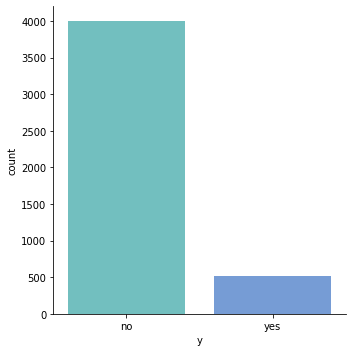

In [109]:
yes = df[df['y']=='yes'].shape[0]
no = df[df['y']=='no'].shape[0]
print("Yes: " + str(yes) + ", No: " + str(no))
sns.catplot(data=df, x="y", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
- The target y are highly imbalanced
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.


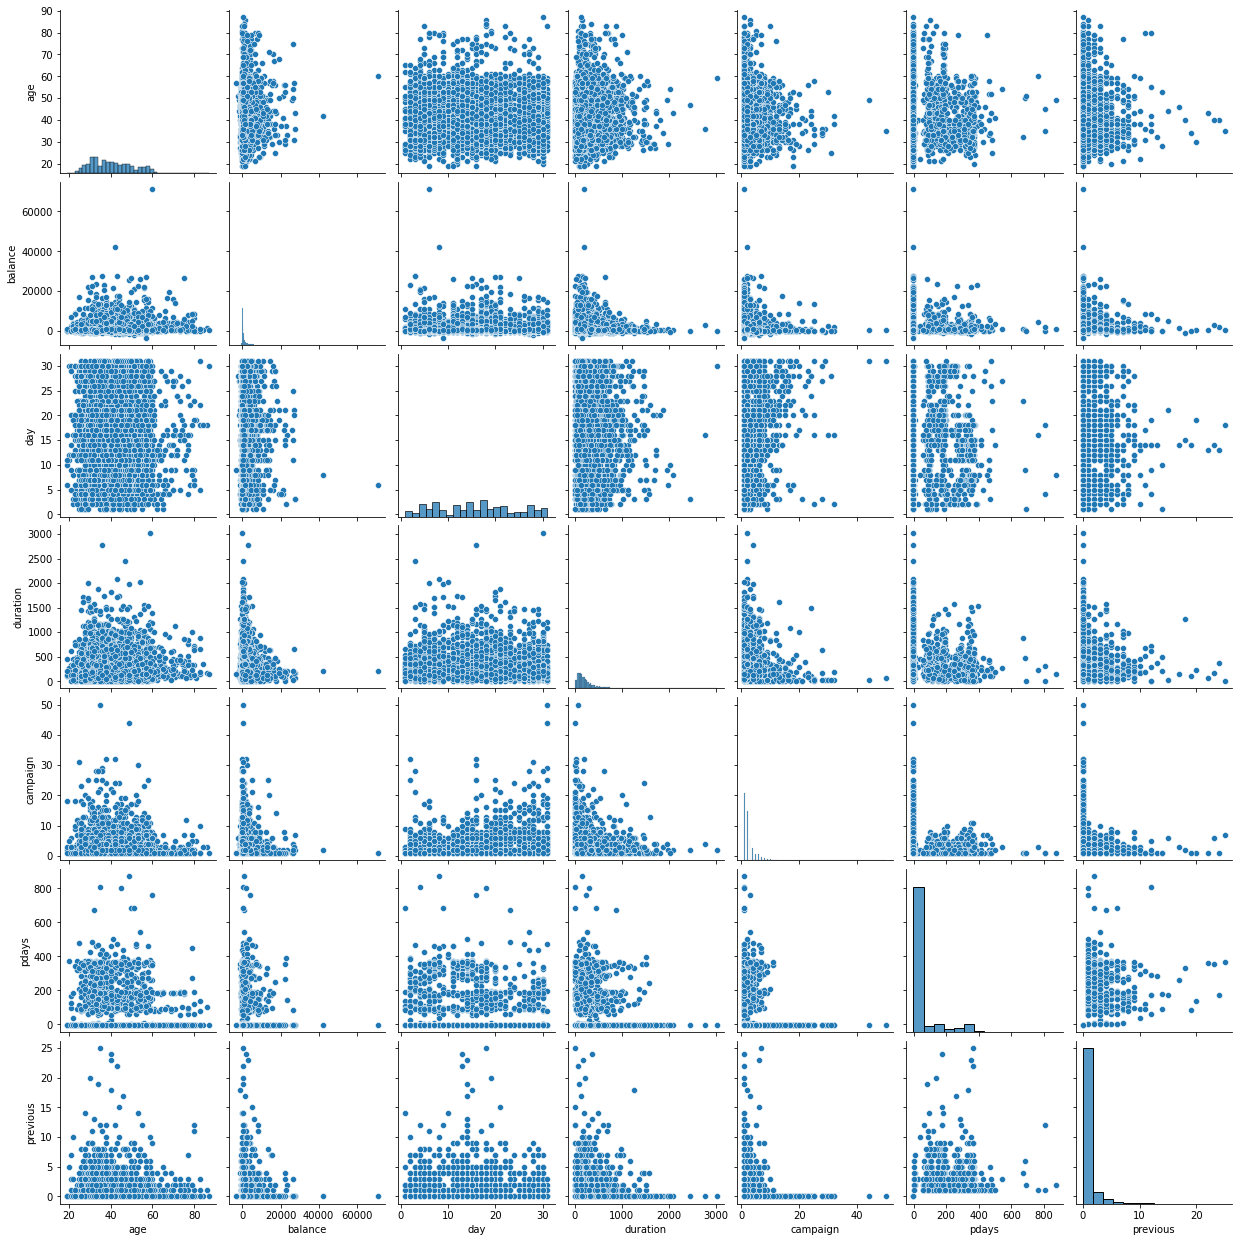

In [110]:
sns.pairplot(df)

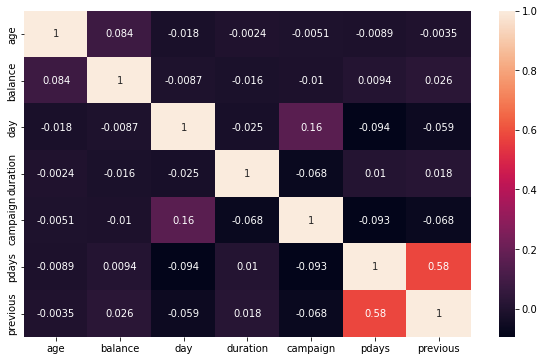

In [112]:
# correlation matrix
cor= df.corr()
#plotting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

# Plot distribution of all Independent Numerical variables

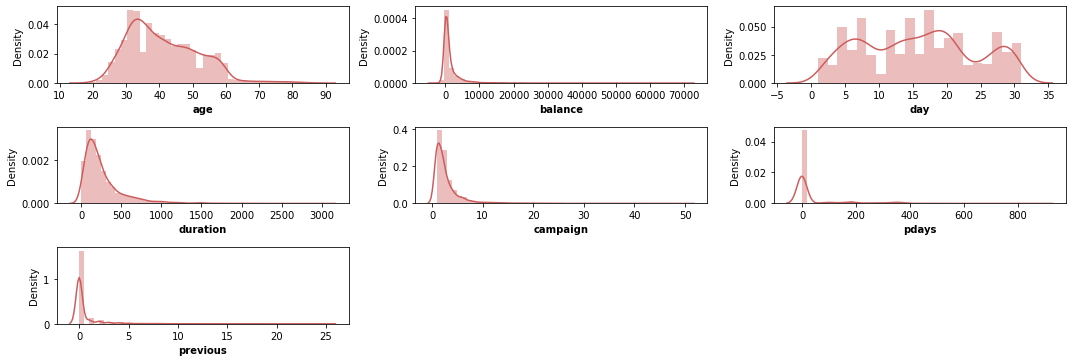

In [113]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

# Report

As per the above plot most of the features are normally distributed.
Transformation of data is not of prime importance since it is a classification problem.
Interpreting each and every column is not necessary 

In [114]:
df[['pdays', 'campaign', 'previous']].describe().T

,count,mean,std,min,25%,50%,75%,max
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


# Data Cleaning

Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

Convert columns with 'yes' and 'no' values to boolean columns;

Convert categorical columns into dummy variables.


In [115]:
#drop irrelevant columns
df = df.drop(columns = ['pdays'])

In [117]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
    
    
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [118]:

#clean the Train dataset
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,y,default_bool,housing_bool,loan_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,30,1787,19,79,no,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1.0,0
1,33,4789,11,220,no,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1.0,4
2,35,1350,16,185,no,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,30,1476,3,199,no,0,1,1,0,0,...,0,0,0,0,0,0,0,1,4.0,0
4,59,0,5,226,no,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0


# Evaluate Model on Different experiments

In [121]:
# separate dataset into train and test
X=cleaned_df.drop('y', axis=1)

y=cleaned_df['y']

# Manually Encoding Target Variable

y=y.replace({'yes': 1, 'no': 0})

In [123]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X,y)

# Handling Imbalanced data

SMOTE+TOMEK is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.


This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

# Initialize Default Models in a dictionary

In [124]:
# Dictionary which contains models for experiment
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier()
}

# Create Functions for model training and evaluation

In [125]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = (accuracy_score(true, predicted))*100 # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [126]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [127]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X,y ,models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [128]:
report = evaluate_models(X_res, y_res, models)

Logistic Regression
Model performance for Training set
- Accuracy: 88.3410
- F1 score: 0.8822
- Precision: 0.8988
- Recall: 0.8662
- Roc Auc Score: 0.8836
- COST: 209510.
----------------------------------
Model performance for Test set
- Accuracy: 87.9896
- F1 score: 0.8752
- Precision: 0.8799
- Recall: 0.8704
- Roc Auc Score: 0.8796
- COST: 48880.


Random Forest
Model performance for Training set
- Accuracy: 100.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 94.7781
- F1 score: 0.9457
- Precision: 0.9521
- Recall: 0.9393
- Roc Auc Score: 0.9475
- COST: 22850.


Gradient Boosting
Model performance for Training set
- Accuracy: 94.6114
- F1 score: 0.9466
- Precision: 0.9457
- Recall: 0.9475
- Roc Auc Score: 0.9461
- COST: 82680.
----------------------------------
Model performance for Test set
- Accuracy: 93.2115
- F1 score: 0.9303
- Precision: 0.9241
- Recall:

# Random forest is best model with 100 % Accuracy


